# 2012 미국 대선

In [2]:
import pandas as pd

In [3]:
fec = pd.read_csv('data/pydata-book/us_presidental.csv')

C:\Program Files\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
fec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001731 entries, 0 to 1001730
Data columns (total 16 columns):
cmte_id              1001731 non-null object
cand_id              1001731 non-null object
cand_nm              1001731 non-null object
contbr_nm            1001731 non-null object
contbr_city          1001712 non-null object
contbr_st            1001727 non-null object
contbr_zip           1001620 non-null object
contbr_employer      988002 non-null object
contbr_occupation    993301 non-null object
contb_receipt_amt    1001731 non-null float64
contb_receipt_dt     1001731 non-null object
receipt_desc         14166 non-null object
memo_cd              92482 non-null object
memo_text            97770 non-null object
form_tp              1001731 non-null object
file_num             1001731 non-null int64
dtypes: float64(1), int64(1), object(14)
memory usage: 122.3+ MB


In [5]:
fec.ix[123456]

cmte_id                             C00431445
cand_id                             P80003338
cand_nm                         Obama, Barack
contbr_nm                         ELLMAN, IRA
contbr_city                             TEMPE
contbr_st                                  AZ
contbr_zip                          852816719
contbr_employer      ARIZONA STATE UNIVERSITY
contbr_occupation                   PROFESSOR
contb_receipt_amt                          50
contb_receipt_dt                    01-DEC-11
receipt_desc                              NaN
memo_cd                                   NaN
memo_text                                 NaN
form_tp                                 SA17A
file_num                               772372
Name: 123456, dtype: object

In [10]:
fec = fec.rename(columns={'cand_nm': '후보자'})

In [15]:
후보자명단 = fec.후보자.drop_duplicates().reset_index(drop=True)

In [16]:
후보자명단

0                 Bachmann, Michelle
1                       Romney, Mitt
2                      Obama, Barack
3     Roemer, Charles E. 'Buddy' III
4                  Pawlenty, Timothy
5                 Johnson, Gary Earl
6                          Paul, Ron
7                     Santorum, Rick
8                       Cain, Herman
9                     Gingrich, Newt
10              McCotter, Thaddeus G
11                     Huntsman, Jon
12                       Perry, Rick
Name: 후보자, dtype: object

In [17]:
정당사전 = {
    'Obama, Barack': '민주당',
    'Romney, Mitt': '공화당'
}

In [22]:
정당 = fec.후보자.map(정당사전)


In [23]:
정당.value_counts()

민주당    593746
공화당    107229
Name: 후보자, dtype: int64

In [24]:
fec['정당'] = 정당

In [25]:
fec[:3]

,cmte_id,cand_id,후보자,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,정당
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166,NaN
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,50.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166,NaN
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,3.68633e+08,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073,NaN


환급금 제외

In [28]:
fec = fec.rename(columns={'contb_receipt_amt': '액수'})

In [30]:
fec = fec[fec.액수 > 0]

오바마와 롬니 자료만

In [33]:
오바롬니 = fec[fec.후보자.isin(['Obama, Barack', 'Romney, Mitt'])]

In [34]:
len(오바롬니)

694282

어떤 직업을 가진 사람들이 누구를 지지했나?

In [35]:
fec = fec.rename(columns={'contbr_occupation': '직업'})

기부자 직업 상위 10

In [41]:
fec.직업.value_counts()[:10]

RETIRED                                   233990
INFORMATION REQUESTED                      35107
ATTORNEY                                   34286
HOMEMAKER                                  29931
PHYSICIAN                                  23432
INFORMATION REQUESTED PER BEST EFFORTS     21138
ENGINEER                                   14334
TEACHER                                    13990
CONSULTANT                                 13273
PROFESSOR                                  12555
Name: 직업, dtype: int64

In [45]:
def 명칭정리(직업명):
    직업사전 = {
        'INFORMATION REQUESTED PER BEST EFFORTS': 'NOT PROVIDED',
        'INFORMATION REQUESTED': 'NOT PROVIDED',
        'INFORMATION REQUESTED (BEST EFFORTS)': 'NOT PROVIDED',
        'C.E.O.' : 'CEO'
    }
    return 직업사전.get(직업명, 직업명)

In [46]:
fec.직업.map(명칭정리).value_counts()

RETIRED                                 233990
NOT PROVIDED                             57151
ATTORNEY                                 34286
HOMEMAKER                                29931
PHYSICIAN                                23432
ENGINEER                                 14334
TEACHER                                  13990
CONSULTANT                               13273
PROFESSOR                                12555
NOT EMPLOYED                              9828
SALES                                     8333
LAWYER                                    8283
MANAGER                                   8024
PRESIDENT                                 7758
STUDENT                                   7071
CEO                                       6526
OWNER                                     6343
EXECUTIVE                                 5506
SELF-EMPLOYED                             5472
WRITER                                    5128
SOFTWARE ENGINEER                         4960
BUSINESS OWNE

In [65]:
오바롬니 = 오바롬니.rename(columns={
        'contbr_employer':'고용주',
        'contbr_occupation': '직업'
    })

In [57]:
고용주 = 오바롬니.고용주.dropna()
고용주[고용주.str.startswith('INFORMATION REQUESTED')] = 'NOT PROVIDED'
고용주[고용주.str.lower().str.startswith('SELF')] = 'SELF-EMPLOYED'

In [59]:
고용주.value_counts()[:10]

RETIRED              173287
SELF-EMPLOYED         79638
NOT EMPLOYED          45727
NOT PROVIDED          38628
HOMEMAKER             12081
OBAMA FOR AMERICA      1741
STUDENT                1417
SELF                   1228
DISABLED               1096
IBM                    1027
Name: 고용주, dtype: int64

In [60]:
오바롬니['고용주'] = 고용주

In [66]:
직업별정당별 = 오바롬니.groupby(['직업', '정당'])

In [68]:
직업별정당별['액수'].sum().unstack()[:10]

정당,공화당,민주당
직업,,
MIXED-MEDIA ARTIST / STORYTELLER,NaN,100.0
AREA VICE PRESIDENT,NaN,250.0
RESEARCH ASSOCIATE,NaN,100.0
TEACHER,NaN,500.0
THERAPIST,NaN,3900.0
-,NaN,5000.0
.NET PROGRAMMER,NaN,481.0
07/13/1972,NaN,98.0
12K ADVOCATE,NaN,150.0


In [69]:
직업별정당별_기부금합계 = 오바롬니.pivot_table('액수', aggfunc='sum',
                               index='직업', columns='정당')

In [73]:
직업별정당별_기부금합계[:20]

정당,공화당,민주당
직업,,
MIXED-MEDIA ARTIST / STORYTELLER,NaN,100.0
AREA VICE PRESIDENT,NaN,250.0
RESEARCH ASSOCIATE,NaN,100.0
TEACHER,NaN,500.0
THERAPIST,NaN,3900.0
-,NaN,5000.0
.NET PROGRAMMER,NaN,481.0
07/13/1972,NaN,98.0
12K ADVOCATE,NaN,150.0


In [74]:
직업별정당별_기부금합계.sum(1)[:3]

직업
   MIXED-MEDIA ARTIST / STORYTELLER    100.0
 AREA VICE PRESIDENT                   250.0
 RESEARCH ASSOCIATE                    100.0
dtype: float64

In [79]:
부자직업 = 직업별정당별_기부금합계[
    직업별정당별_기부금합계.sum(1) > 2*10**6
]

In [80]:
부자직업[:10]

정당,공화당,민주당
직업,,
ATTORNEY,5364718.82,11141982.97
CEO,355910.92,2073284.79
CONSULTANT,1424894.01,2459912.71
EXECUTIVE,2300947.03,1355161.05
HOMEMAKER,8147446.22,4248875.80
INFORMATION REQUESTED,NaN,4866973.96
INFORMATION REQUESTED PER BEST EFFORTS,11396894.84,NaN
INVESTOR,1537595.12,884133.00
LAWYER,7705.20,3160478.87


어떤 직업들이 많이 지지했을까?


In [82]:
후보별 = 오바롬니.groupby('후보자')

In [90]:
def get_top_amounts(group, key, n=5):
    # key로 지정된 열 기준으로 분류해 기부금 액수 합계 산출
    totals = group.groupby(key)['액수'].sum()
    return totals.sort_values()[::-1][:n]

In [93]:
후보별.apply(get_top_amounts, '직업', n=7).unstack(0)

후보자,"Obama, Barack","Romney, Mitt"
직업,,
ATTORNEY,11141982.97,5364718.82
C.E.O.,NaN,1968386.11
CONSULTANT,2459912.71,NaN
EXECUTIVE,NaN,2300947.03
HOMEMAKER,4248875.80,8147446.22
INFORMATION REQUESTED,4866973.96,NaN
INFORMATION REQUESTED PER BEST EFFORTS,NaN,11396894.84
LAWYER,3160478.87,NaN
PHYSICIAN,3735124.94,NaN


In [94]:
기부금액구간 = [0,1,10,100,1000,10**4, 10**5, 10**6, 10**7]
labels = pd.cut(오바롬니.액수, 기부금액구간)

In [97]:
%matplotlib inline

In [99]:
labels.value_counts()

(10, 100]              404133
(100, 1000]            197348
(1000, 10000]           48470
(1, 10]                 43751
(0, 1]                    570
(1000000, 10000000]         4
(100000, 1000000]           3
(10000, 100000]             3
Name: 액수, dtype: int64

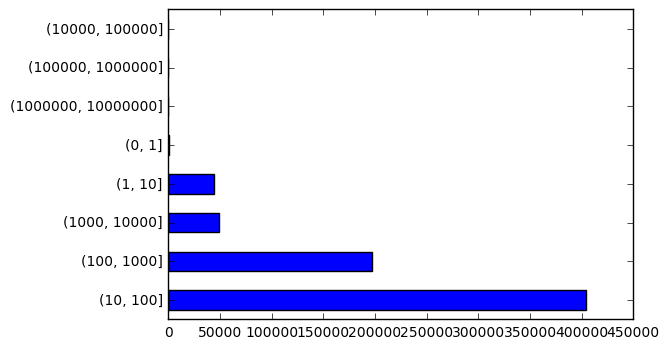

In [98]:
labels.value_counts().plot(kind='barh')

"오바마는 소액 기부자들의 지지를 많이 받았나?"

In [101]:
후보별기부금액단위별 = 오바롬니.groupby(['후보자', labels])

In [106]:
후보별기부금액단위별.size().unstack(0)


후보자,"Obama, Barack","Romney, Mitt"
액수,,
"(0, 1]",493.0,77.0
"(1, 10]",40070.0,3681.0
"(10, 100]",372280.0,31853.0
"(100, 1000]",153991.0,43357.0
"(1000, 10000]",22284.0,26186.0
"(10000, 100000]",2.0,1.0
"(100000, 1000000]",3.0,NaN
"(1000000, 10000000]",4.0,NaN
